In [39]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
data = pd.read_csv('/content/drive/MyDrive/01Training/Data/Data/fake_currency.txt', header = None)

In [42]:
data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [43]:
data.columns = ['variance', 'skewness', 'kurtosis', 'entry', 'authenticity']

In [44]:
data.head()

,variance,skewness,kurtosis,entry,authenticity
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [45]:
data.describe()

,variance,skewness,kurtosis,entry,authenticity
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   variance      1372 non-null   float64
 1   skewness      1372 non-null   float64
 2   kurtosis      1372 non-null   float64
 3   entry         1372 non-null   float64
 4   authenticity  1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


(array([762.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 610.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

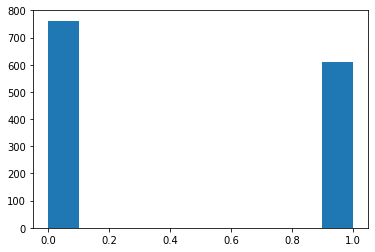

In [47]:
plt.hist(data['authenticity'])

In [48]:
data.corr()

,variance,skewness,kurtosis,entry,authenticity
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
kurtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entry,0.276817,-0.526321,0.318841,1.000000,-0.023424
authenticity,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [49]:
corr = data.corr()

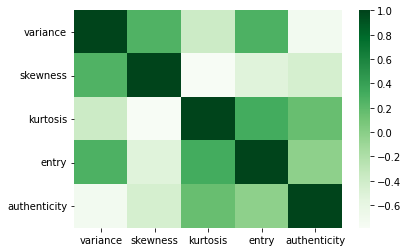

In [50]:
sns.heatmap(corr, cmap = 'Greens')

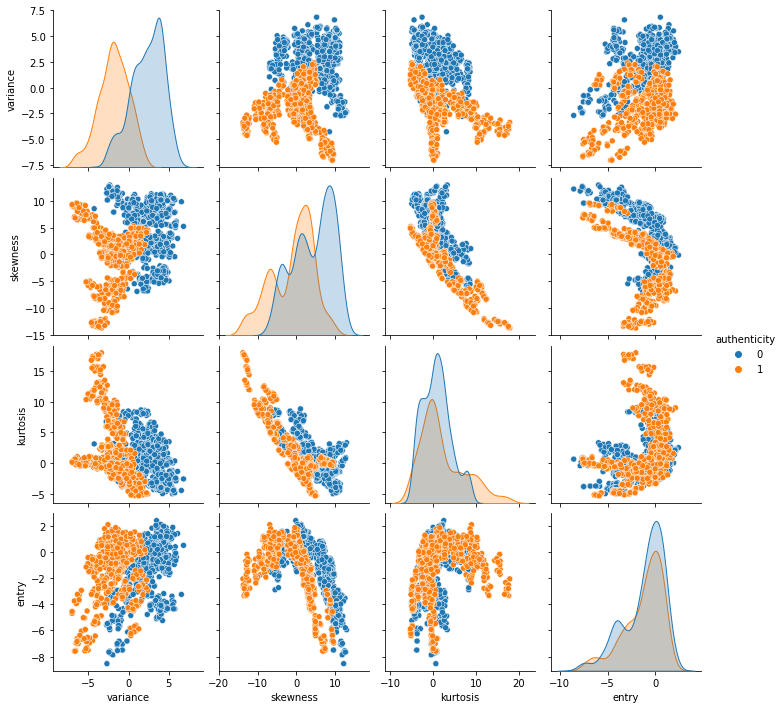

In [51]:
sns.pairplot(data, hue = 'authenticity')

In [52]:
x = data[['variance', 'kurtosis', 'skewness', 'entry']]
y = data['authenticity']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)

In [54]:
scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [55]:
lr = LogisticRegression(solver='lbfgs', random_state=22, multi_class='auto')
lr.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=22)

In [56]:
y_pred = np.array(lr.predict(x_test))
matrix = pd.DataFrame(confusion_matrix(y_test, y_pred),
                        columns=["Predicted Negative", "Predicted Positive"],
                        index=['Actual Negative', "Actual Positive"])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 5)
print(matrix)
print(f'\n Accuracy: {round(100*accuracy, 3)}%')

                 Predicted Negative  Predicted Positive
Actual Negative                 139                   2
Actual Positive                   2                 132

 Accuracy: 98.545%
